Denzel Caesarian Iswanto Suhardjo (2440021376 - LB01 - COMP6745001: Machine Learning - Mid Exam)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

insuranceData = pd.read_csv('insurance-cost.csv')
insuranceDF = pd.DataFrame(insuranceData)

print(insuranceDF.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
print(insuranceDF.shape)

(1338, 7)


Dari data di atas, dapat disimpulkan bahwa dataset Insurance Cost memiliki 1338 baris dan 7 kolom.

In [3]:
print(insuranceDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


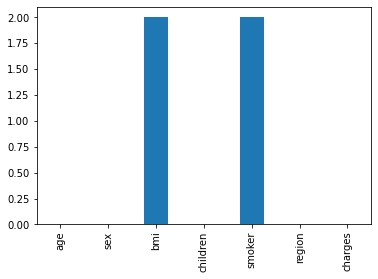

In [4]:
# Memeriksa Missing Value
insuranceDF.isna().sum().plot(kind = 'bar')
plt.show()

Grafik di atas menyatakan bahwa ada 2 data yang bernilai NaN pada variabel 'bmi' dan 2 data yang bernilai NaN pada variabel 'smoker'.

In [5]:
insuranceDF[insuranceDF['bmi'].isnull()].index.tolist()

[30, 51]

In [6]:
MaleBMIMean = insuranceDF[insuranceDF['sex'] == 'male']['bmi'].mean()
FemaleBMIMean = insuranceDF[insuranceDF['sex'] == 'female']['bmi'].mean()
print('Male: ', MaleBMIMean, ' Female: ', FemaleBMIMean)

Male:  30.93622962962961  Female:  30.37282904689867


In [7]:
MaleBMIUpdated = insuranceDF[insuranceDF['sex'] == 'male']['bmi'].fillna(insuranceDF[insuranceDF['sex'] == 'male']['bmi'].mean())
print(MaleBMIUpdated.head())

1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64


In [8]:
FemaleBMIUpdated = insuranceDF[insuranceDF['sex'] == 'female']['bmi'].fillna(insuranceDF[insuranceDF['sex'] == 'female']['bmi'].mean())
print(FemaleBMIUpdated.head())

0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64


In [9]:
insuranceDF['bmi'].update(MaleBMIUpdated)
insuranceDF['bmi'].update(FemaleBMIUpdated)
print(insuranceDF.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


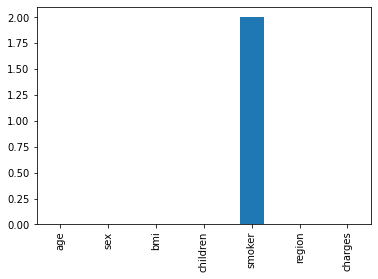

In [10]:
insuranceDF.isna().sum().plot(kind = 'bar')
plt.show()

In [11]:
insuranceDF[insuranceDF['smoker'].isnull()].index.tolist()

[32, 53]

In [12]:
from collections import Counter

MaleSmokerCounter = Counter(insuranceDF[insuranceDF['sex'] == 'male']['smoker'])
MaleModeSmoker = MaleSmokerCounter.most_common(1)

FemaleSmokerCounter = Counter(insuranceDF[insuranceDF['sex'] == 'female']['smoker'])
FemaleModeSmoker = FemaleSmokerCounter.most_common(1)

print('Male: ', MaleModeSmoker[0][0], ' Female: ', FemaleModeSmoker[0][0])

Male:  no  Female:  no


In [13]:
MaleSmokerUpdated = insuranceDF[insuranceDF['sex'] == 'male']['smoker'].fillna(MaleModeSmoker[0][0])
print(MaleSmokerUpdated.head())

1    no
2    no
3    no
4    no
8    no
Name: smoker, dtype: object


In [14]:
FemaleSmokerUpdated = insuranceDF[insuranceDF['sex'] == 'female']['smoker'].fillna(FemaleModeSmoker[0][0])
print(FemaleSmokerUpdated.head())

0    yes
5     no
6     no
7     no
9     no
Name: smoker, dtype: object


In [15]:
insuranceDF['smoker'].update(MaleSmokerUpdated)
insuranceDF['smoker'].update(FemaleSmokerUpdated)
print(insuranceDF.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


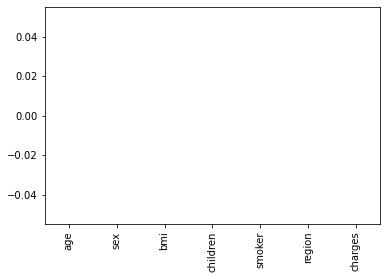

In [16]:
insuranceDF.isna().sum().plot(kind = 'bar')
plt.show()

Setelah melakukan proses cleaning data, visualisasi grafik di atas tidak menampilkan bar apapun yang menandakan bahwa sudah tidak ada data yang bernilai NaN di dalam dataset Insurance Cost.

In [17]:
# Visual Exploratory Data Analysis
insuranceDF.nunique()

age           47
sex            2
bmi          549
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [18]:
AgeCategory = []
insuranceDF['ageCategory'] = np.nan

for index, row in insuranceDF.iterrows():
    if row['age'] <= 15:
        AgeCategory.append('Children')
    elif np.logical_and(row['age'] > 15, row['age'] <= 25):
        AgeCategory.append('Youth')
    elif np.logical_and(row['age'] > 25, row['age'] <= 50):
        AgeCategory.append('Adult')
    elif row['age'] > 50:
        AgeCategory.append('Seniors')

Untuk mempermudah proses Exploratory Data Analysis, saya menambahkan variabel Age Category yang mengelompokkan umur menjadi empat kategori yaitu Children apabila berusia kurang dari sama dengan 15 tahun, Youth apabila berusia 16 sampai 25 tahun, Adult apabila berusia 26 sampai 50 tahun, dan Seniors apabila berusia lebih dari 50 tahun.

In [19]:
insuranceDF['ageCategory'].update(AgeCategory)
print(insuranceDF)

      age     sex     bmi  children smoker     region      charges ageCategory
0      19  female  27.900         0    yes  southwest  16884.92400       Youth
1      18    male  33.770         1     no  southeast   1725.55230       Youth
2      28    male  33.000         3     no  southeast   4449.46200       Adult
3      33    male  22.705         0     no  northwest  21984.47061       Adult
4      32    male  28.880         0     no  northwest   3866.85520       Adult
...   ...     ...     ...       ...    ...        ...          ...         ...
1333   50    male  30.970         3     no  northwest  10600.54830       Adult
1334   18  female  31.920         0     no  northeast   2205.98080       Youth
1335   18  female  36.850         0     no  southeast   1629.83350       Youth
1336   21  female  25.800         0     no  southwest   2007.94500       Youth
1337   61  female  29.070         0    yes  northwest  29141.36030     Seniors

[1338 rows x 8 columns]


In [20]:
insuranceDF.groupby('ageCategory').sum()

,age,bmi,children,charges
ageCategory,,,,
Adult,25783,20559.085000,946,8.536943e+06
Seniors,20342,11286.290000,315,6.438255e+06
Youth,6334,9174.329059,204,2.780627e+06


Text(0, 0.5, 'Count')

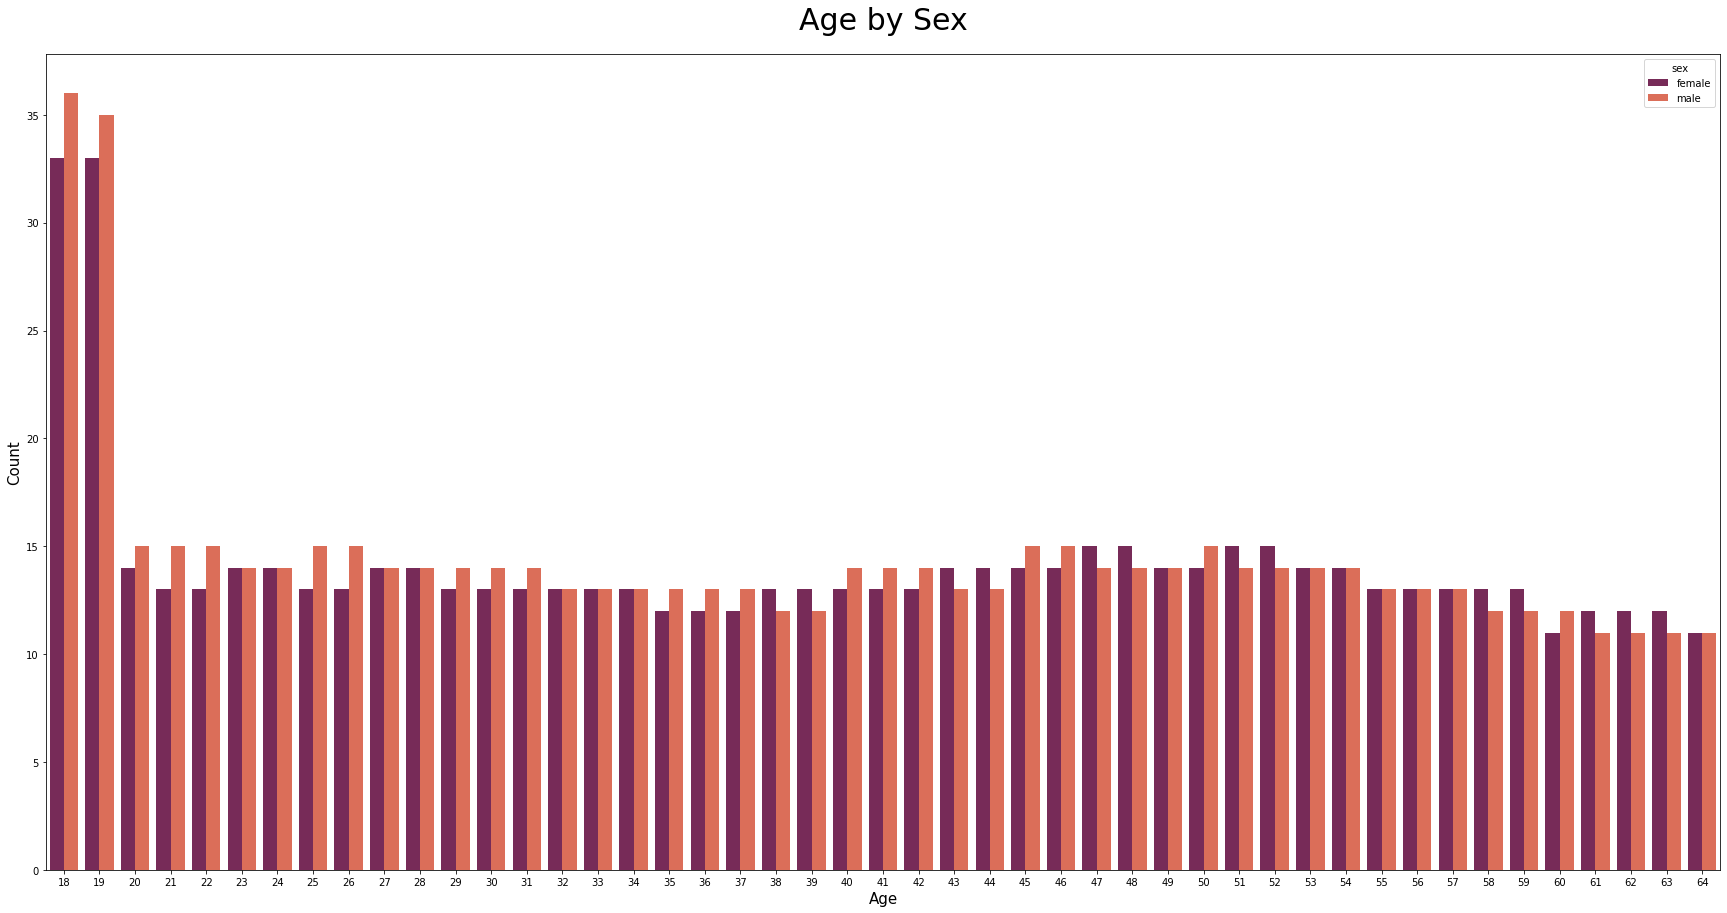

In [21]:
plt.subplots(figsize = (30, 15))

plt.subplot(1, 1, 1)
sns.countplot(x = insuranceDF['age'], hue = insuranceDF['sex'], palette = 'rocket')
plt.title('Age by Sex', fontsize = 30, pad = 25)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Gambar di atas merupakan grafik visualisasi dari Independent Variable 'Age'.

Grafik di atas menampilkan persebaran jumlah orang dengan usia tertentu berdasarkan jenis kelamin. Dapat kita lihat, baik jenis kelamin laki-laki maupun perempuan, sama-sama didominasi oleh orang yang berusia 18 dan 19 tahun. Sementara kelompok usia lainnya memiliki jumlah yang hampir setara.

Text(0, 0.5, 'Age')

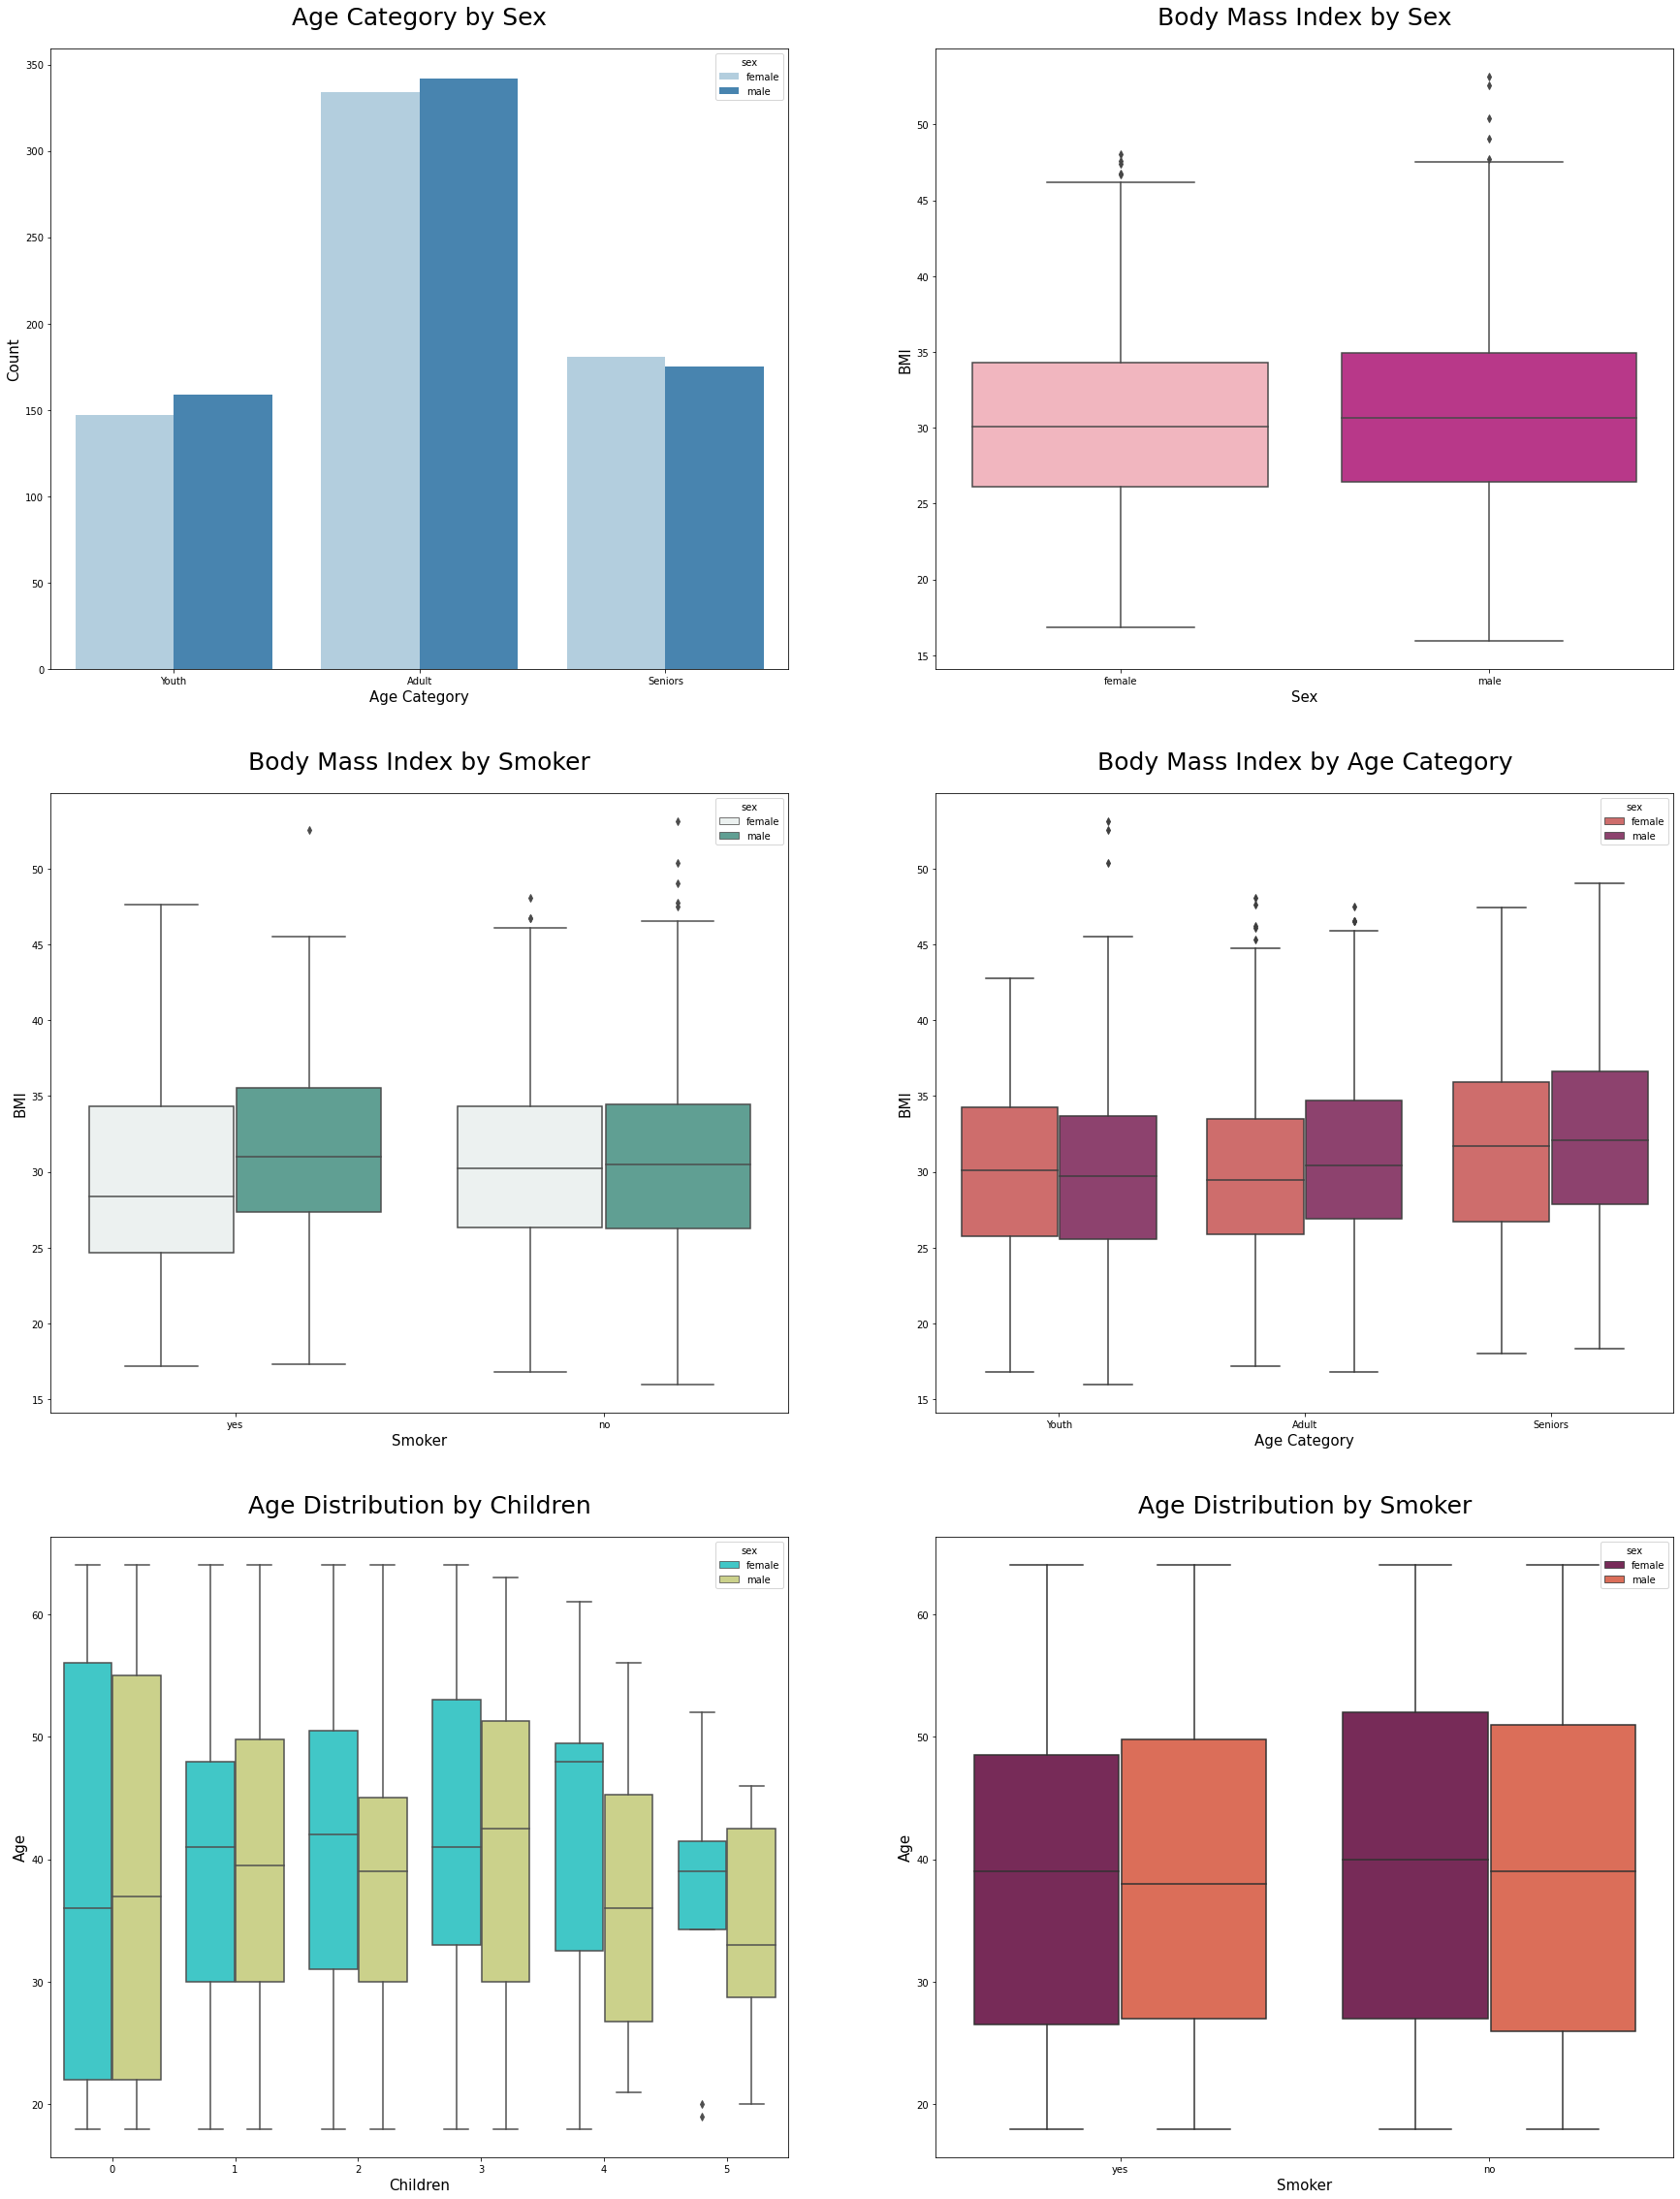

In [22]:
plt.subplots(figsize = (30, 40))

plt.subplot(3, 2, 1)
sns.countplot(x = insuranceDF['ageCategory'], hue = insuranceDF['sex'], palette = 'Blues')
plt.title('Age Category by Sex', fontsize = 25, pad = 25)
plt.xlabel('Age Category', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 2, 2)
sns.boxplot(x = insuranceDF['sex'], y = insuranceDF['bmi'], palette = 'RdPu')
plt.title('Body Mass Index by Sex', fontsize = 25, pad = 25)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)

plt.subplot(3, 2, 3)
sns.boxplot(x = insuranceDF['smoker'], y = insuranceDF['bmi'], hue = insuranceDF['sex'], palette = 'light:#5A9')
plt.title('Body Mass Index by Smoker', fontsize = 25, pad = 25)
plt.xlabel('Smoker', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)

plt.subplot(3, 2, 4)
sns.boxplot(x = insuranceDF['ageCategory'], y = insuranceDF['bmi'], hue = insuranceDF['sex'], palette = 'flare')
plt.title('Body Mass Index by Age Category', fontsize = 25, pad = 25)
plt.xlabel('Age Category', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)

plt.subplot(3, 2, 5)
sns.boxplot(x = insuranceDF['children'], y = insuranceDF['age'], hue = insuranceDF['sex'], palette = 'rainbow')
plt.title('Age Distribution by Children', fontsize = 25, pad = 25)
plt.xlabel('Children', fontsize = 15)
plt.ylabel('Age', fontsize = 15)

plt.subplot(3, 2, 6)
sns.boxplot(x = insuranceDF['smoker'], y = insuranceDF['age'], hue = insuranceDF['sex'], palette = 'rocket')
plt.title('Age Distribution by Smoker', fontsize = 25, pad = 25)
plt.xlabel('Smoker', fontsize = 15)
plt.ylabel('Age', fontsize = 15)

Keenam gambar di atas menunjukkan relasi di antara beberapa Independent Variabel yang dimiliki oleh dataset Insurance Cost.

Plot yang pertama menampilkan grafik batang jumlah kategori usia yang dibagi menjadi dua untuk masing-masingnya berdasarkan jenis kelamin. Dari grafik tersebut dapat disimpulkan bahwa data Insurance Cost didominasi oleh orang-orang yang berada di dalam kategori Adult.

Plot yang kedua menampilkan grafik box yang merepresentasikan Body Mass Index berdasarkan jenis kelamin. Seperti yang dapat kita lihat, tidak ada perbedaan signifikan antara data Body Mass Index untuk laki-laki dan Body Mass Index untuk perempuan.

Plot yang ketiga menampilkan grafik box yang merepresentasikan Body Mass Index berdasarkan variabel Smoker yang masing-masing dibagi lagi berdasarkan jenis kelamin.

Plot yang keempat menampilkan grafik box yang merepresentasikan Body Mass Index berdasarkan kelompok usia. Dari grafik tersebut dapat kita lihat bahwa orang-orang yang termasuk ke kelompok usia Seniors cenderung memiliki Body Mass Index yang lebih tinggi dibandingkan kelompok usia lainnya.

Plot yang kelima menampilkan grafik box yang merepresentasikan Usia berdasarkan jumlah anak. Dari grafik tersebut dapat disimpulkan bahwa masih banyak orang-orang baik usia muda maupun usia tua yang tidak atau belum memiliki anak.

Plot terakhir menampilkan grafik box yang merepresentasikan Usia berdasarkan variabel Smoker. Berdasarkan grafik tersebut, tidak ada perbedaan yang signifikan antara perokok dan bukan perokok. Baik perokok maupun bukan perokok terbagi rata ke dalam semua kelompok usia.

Text(0, 0.5, 'Count')

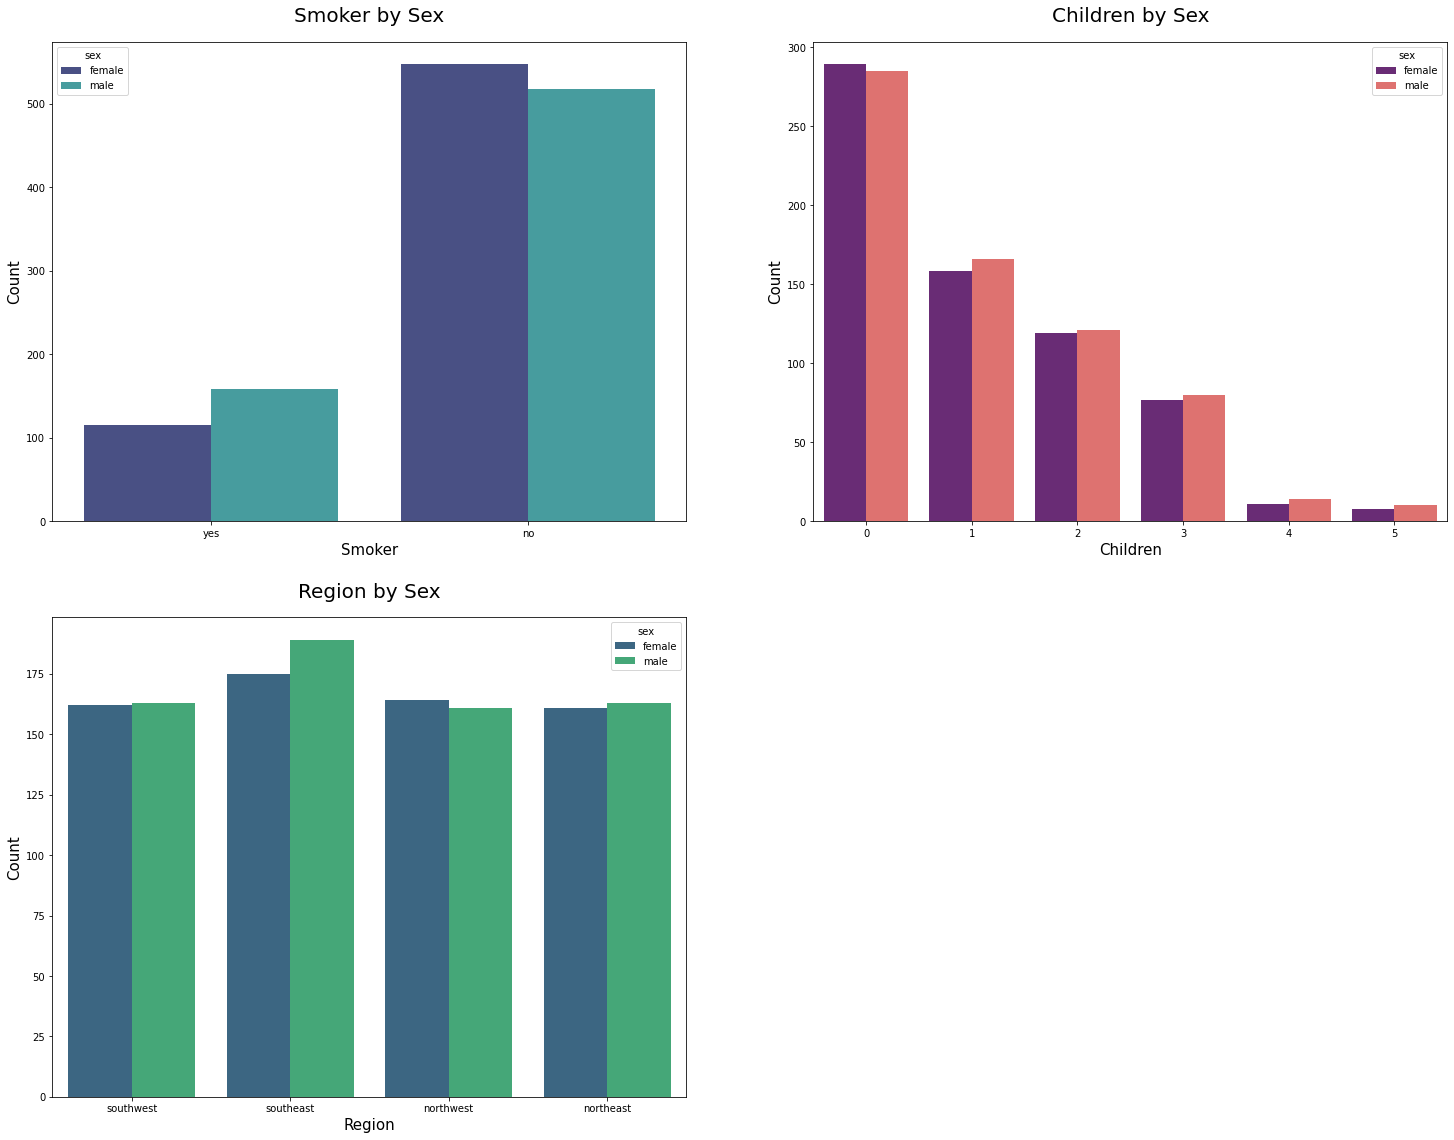

In [23]:
plt.subplots(figsize = (25, 30))

plt.subplot(3, 2, 1)
sns.countplot(x = insuranceDF['smoker'], hue = insuranceDF['sex'], palette = 'mako')
plt.title('Smoker by Sex', fontsize = 20, pad = 20)
plt.xlabel('Smoker', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 2, 2)
sns.countplot(x = insuranceDF['children'], hue = insuranceDF['sex'], palette = 'magma')
plt.title('Children by Sex', fontsize = 20, pad = 20)
plt.xlabel('Children', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(3, 2, 3)
sns.countplot(x = insuranceDF['region'], hue = insuranceDF['sex'], palette = 'viridis')
plt.title('Region by Sex', fontsize = 20, pad = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Tiga gambar di atas merupakan grafik visualisasi dari empat Independent Variabel berbeda yaitu 'Smoker', 'Children', dan 'Region' yang masing-masing sama-sama dibandingkan berdasarkan jenis kelaminnya.

Untuk grafik pertama, dapat kita lihat bahwa jumlah orang yang merokok lebih sedikit daripada jumlah orang yang tidak merokok. Jumlah orang yang merokok didominasi oleh laki-laki, berbeda dengan jumlah orang yang tidak merokok yang didominasi oleh perempuan.

Untuk grafik kedua, dapat kita lihat bahwa masih banyak orang yang belum memiliki anak. Hal ini dibuktikan dengan batang jumlah anak 0 mendominasi grafik. Dari grafik ini juga, kita dapat membuat kesimpulan bahwa tidak banyak orang memiliki banyak anak. Hal ini dibuktikan pada grafik dimana semakin banyak jumlah anak yang dimiliki, semakin pendek grafik batangnya yang menandakan semakin sedikit jumlah orangnya.

Untuk grafik terakhir, dapat kita lihat bahwa area tempat tinggal memiliki panjang grafik batang yang hampir setara satu sama lain.

Text(0, 0.5, 'Insurance Charges')

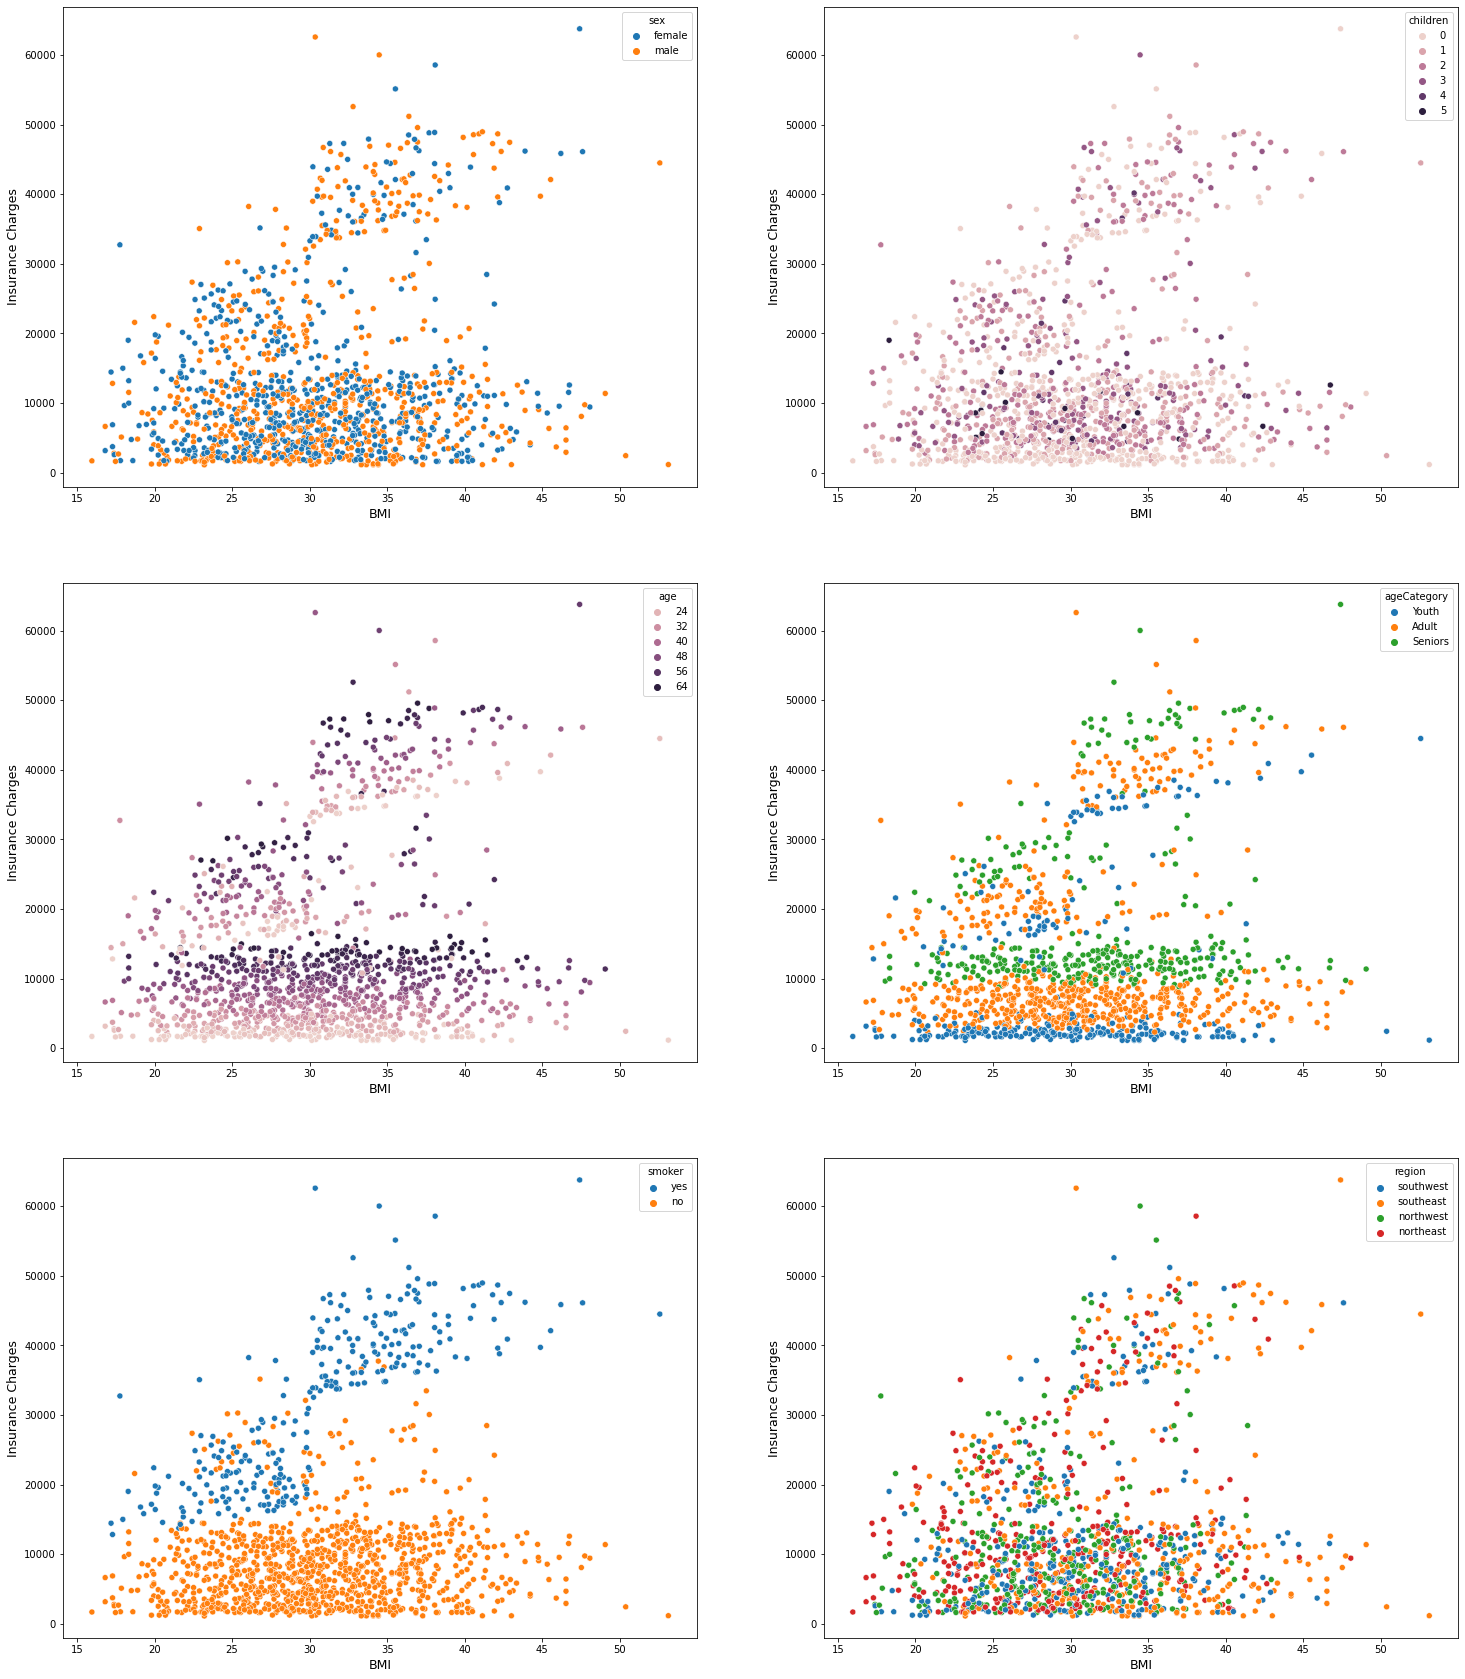

In [24]:
plt.subplots(figsize = (25, 30))

plt.subplot(3, 2, 1)
sns.scatterplot(x = insuranceDF['bmi'], y = insuranceDF['charges'], hue = insuranceDF['sex'])
plt.xlabel('BMI', fontsize = 12.5)
plt.ylabel('Insurance Charges', fontsize = 12.5)

plt.subplot(3, 2, 2)
sns.scatterplot(x = insuranceDF['bmi'], y = insuranceDF['charges'], hue = insuranceDF['children'])
plt.xlabel('BMI', fontsize = 12.5)
plt.ylabel('Insurance Charges', fontsize = 12.5)

plt.subplot(3, 2, 3)
sns.scatterplot(x = insuranceDF['bmi'], y = insuranceDF['charges'], hue = insuranceDF['age'])
plt.xlabel('BMI', fontsize = 12.5)
plt.ylabel('Insurance Charges', fontsize = 12.5)

plt.subplot(3, 2, 4)
sns.scatterplot(x = insuranceDF['bmi'], y = insuranceDF['charges'], hue = insuranceDF['ageCategory'])
plt.xlabel('BMI', fontsize = 12.5)
plt.ylabel('Insurance Charges', fontsize = 12.5)

plt.subplot(3, 2, 5)
sns.scatterplot(x = insuranceDF['bmi'], y = insuranceDF['charges'], hue = insuranceDF['smoker'])
plt.xlabel('BMI', fontsize = 12.5)
plt.ylabel('Insurance Charges', fontsize = 12.5)

plt.subplot(3, 2, 6)
sns.scatterplot(x = insuranceDF['bmi'], y = insuranceDF['charges'], hue = insuranceDF['region'])
plt.xlabel('BMI', fontsize = 12.5)
plt.ylabel('Insurance Charges', fontsize = 12.5)

Jika beberapa grafik sebelumnya menunjukkan hubungan antar variabel independen, enam grafik yang ada di atas ini menunjukkan hubungan antara variabel independen dengan variabel dependen, terkhususnya Body Mass Index dengan Biaya Insurance yang kemudian dikelompokkan lagi berdasarkan variabel tertentu.

Pada scatter plot pertama, baik laki-laki maupun perempuan sama-sama tersebar secara merata ke dalam grafik. Hal ini menunjukkan bahwa jenis kelamin tidak mempengaruhi biaya Insurance.

Pada scatter plot kedua, jumlah anak terlihat sedikit lebih terkelompokkan dibandingkan scatter plot yang sebelumnya. Hal ini menunjukkan bahwa jumlah anak memiliki sedikit peran bagi orang untuk menentukan biaya Insurance.

Pada scatter plot ketiga, terlihat jelas bahwa usia sangat berperan dalam menentukan biaya Insurance. Orang yang sudah berumur lebih memilih untuk mengikuti asuransi dengan biaya yang cenderung lebih besar. Hal ini mungkin saja digunakan untuk berjaga-jaga karena penyakit bisa saja datang kapapun. Untuk lebih jelasnya dapat kita lihat pada scatter plot keempat.

Pada scatter plot kelima, grafik seperti terbagi menjadi dua kelompok besar, yaitu perokok dan non-perokok. Berdasarkan grafik ini juga, kita dapat menyimpulkan bahwa orang-orang perokok cenderung memilih untuk mengikuti asuransi dengan biaya yang lebih besar. Hal ini disebabkan karena merokok itu berbahaya bagi kesehatan sehingga masuk akal apabila para perokok ingin mendapatkan perlindungan dengan mengeluarkan biaya yang besar bagi asuransi.

Pada scatter plot terakhir, baik biaya Insurance kecil maupun besar sama-sama memiliki pelanggan dari region apapun. Hal ini menunjukkan pada kita bahwa region tidak mempengaruhi keikutsertaan orang di dalam asuransi.

Text(0, 0.5, 'Insurance Charges')

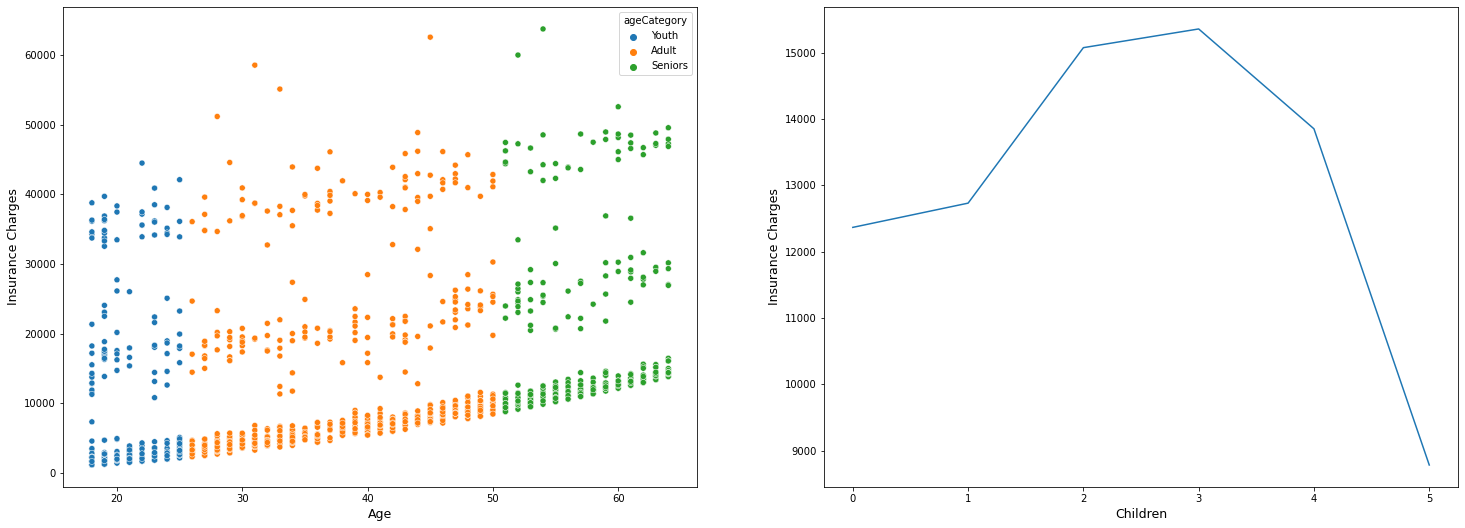

In [25]:
plt.subplots(figsize = (25, 30))

plt.subplot(3, 2, 1)
sns.scatterplot(x = insuranceDF['age'], y = insuranceDF['charges'], hue = insuranceDF['ageCategory'])
plt.xlabel('Age', fontsize = 12.5)
plt.ylabel('Insurance Charges', fontsize = 12.5)

plt.subplot(3, 2, 2)
plt.plot(insuranceDF.groupby('children')['charges'].mean())
plt.xlabel('Children', fontsize = 12.5)
plt.ylabel('Insurance Charges', fontsize = 12.5)

Kedua grafik di atas ini masih menampilkan hubungan antara variabel independen dengan variabel dependen. Pada grafik pertama, terlihat jelas bahwa orang-orang yang sudah berusia memilih untuk membayar biaya Insurance dengan harga yang relatif lebih tinggi daripada orang-orang yang berusia lebih muda. Hal ini menunjukkan bahwa usia memiliki korelasi positif terhadap Insurance Charges sekaligus memperkuat bukti bahwa usia mempengaruhi biaya Insurance peserta. Sementara pada grafik kedua yang memperlihatkan hubungan antara jumlah anak dengan biaya Insurance, terlihat bahwa semakin banyak jumlah anak yang dimiliki, maka semakin kecil biaya Insurance yang ada. Hal ini mungkin saja terjadi karena semakin banyak anak, maka semakin banyak uang yang harus dikeluarkan untuk anak-anak. Maka dari itu, orang pasti memilih biaya Insurance yang lebih kecil untuk menekan pengeluaran.

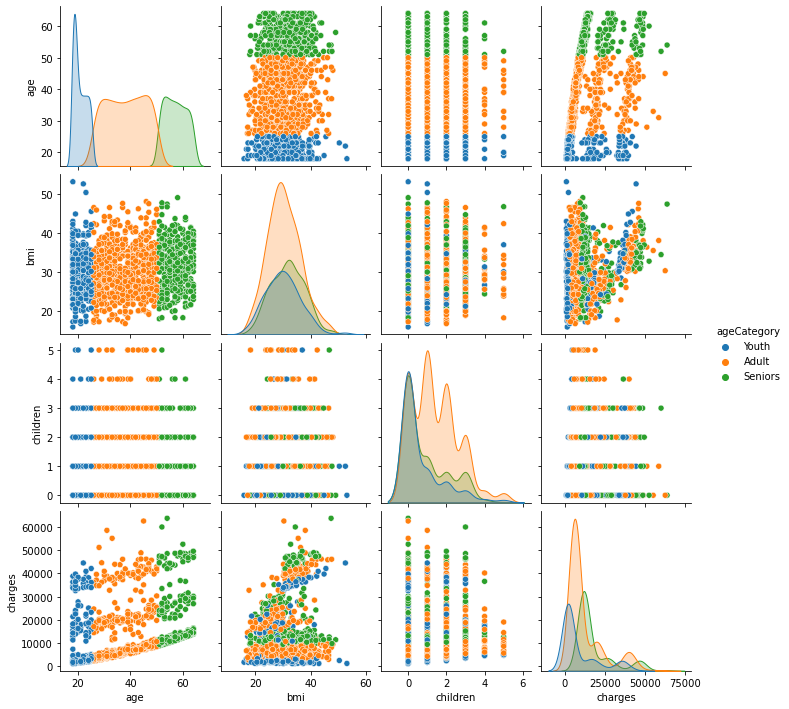

In [26]:
sns.pairplot(insuranceDF, hue = 'ageCategory')

<AxesSubplot:>

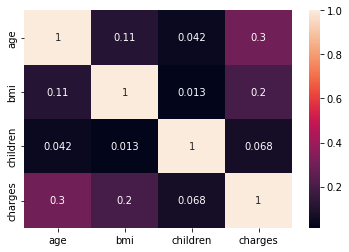

In [27]:
sns.heatmap(insuranceDF.corr(), annot = True)

Plot di atas merupakan Heatmap Plot yang merupakan grafik korelasi antara setiap variabel independen yang bersifat numerical data dengan variabel dependen. Dari grafik tersebut dapat kita simpulkan bahwa Insurance Charges dipengaruhi oleh tiga variabel yaitu usia, Body Mass Index, dan jumlah anak. Dari ketiga variabel independen tersebut, usia merupakan variabel yang paling mempengaruhi karena bernilai paling tinggi, sementara jumlah anak merupakan variabel yang paling kurang mempengaruhi karena bernilai paling rendah.

In [28]:
# Drop Age Category Column
insuranceDF.drop('ageCategory', axis = 1, inplace = True)
print(insuranceDF.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Setelah melakukan Exploratory Data Analysis,yang termasuk ke dalam variabel independen adalah 'age', 'bmi', 'children', dan 'smoker', sementara yang termasuk ke dalam variabel dependen adalah 'charges'.

In [29]:
# Extract Independent and Dependent Variable
x = insuranceDF.drop(['sex', 'region', 'charges'], axis = 1)
y = insuranceDF['charges']

In [30]:
print(x)

      age     bmi  children smoker
0      19  27.900         0    yes
1      18  33.770         1     no
2      28  33.000         3     no
3      33  22.705         0     no
4      32  28.880         0     no
...   ...     ...       ...    ...
1333   50  30.970         3     no
1334   18  31.920         0     no
1335   18  36.850         0     no
1336   21  25.800         0     no
1337   61  29.070         0    yes

[1338 rows x 4 columns]


In [31]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Dikarenakan variabel 'children' memiliki pengaruh yang kecil terhadap Insurance Charges, maka saya akan mengubah data pada variabel 'children' menjadi 1 apabila jumlah anak lebih dari 1, sementara 0 untuk sisanya.

In [32]:
x['children'] = x['children'].apply(lambda child: 1 if child > 1 else 0)
x

,age,bmi,children,smoker
0,19,27.900,0,yes
1,18,33.770,0,no
2,28,33.000,1,no
3,33,22.705,0,no
4,32,28.880,0,no
...,...,...,...,...
1333,50,30.970,1,no
1334,18,31.920,0,no
1335,18,36.850,0,no
1336,21,25.800,0,no


Selain variabel 'children', dikarenakan variabel 'smoker' merupakan categorical data, maka saya akan melakukan proses encoding untuk mengubah nilai dari 'smoker' yang semua categorical data menjadi numerical data.

In [33]:
# Encoding Categorical Data (Smoker)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

x['smoker'] = LabelEncoder().fit_transform(x['smoker'])
print(x)

      age     bmi  children  smoker
0      19  27.900         0       1
1      18  33.770         0       0
2      28  33.000         1       0
3      33  22.705         0       0
4      32  28.880         0       0
...   ...     ...       ...     ...
1333   50  30.970         1       0
1334   18  31.920         0       0
1335   18  36.850         0       0
1336   21  25.800         0       0
1337   61  29.070         0       1

[1338 rows x 4 columns]


In [34]:
Encoded = OneHotEncoder().fit_transform(x[['smoker']]).toarray()
EncodedDF = pd.DataFrame(Encoded)
print(EncodedDF.head())

     0    1
0  0.0  1.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0


In [35]:
header = insuranceDF['smoker'].sort_values().unique()
EncodedDF.columns = 'Smoker_' + header
EncodedDF

,Smoker_no,Smoker_yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1333,1.0,0.0
1334,1.0,0.0
1335,1.0,0.0
1336,1.0,0.0


In [36]:
x = x.drop('smoker', axis = 1)
x = x.join(EncodedDF['Smoker_yes'])
x

,age,bmi,children,Smoker_yes
0,19,27.900,0,1.0
1,18,33.770,0,0.0
2,28,33.000,1,0.0
3,33,22.705,0,0.0
4,32,28.880,0,0.0
...,...,...,...,...
1333,50,30.970,1,0.0
1334,18,31.920,0,0.0
1335,18,36.850,0,0.0
1336,21,25.800,0,0.0


Untuk saat ini, dapat kita lihat bahwa ada perbedaan range nilai diantara variabel, sebagai contoh variabel 'age' memiliki range nilai 18 - 64, sementara variabel 'children' memiliki range nilai 0 - 5. Maka dari itu, saya akan melakukan Standardization pada data sehingga masing-masing variabel memiliki range nilai yang hampir setara.

In [37]:
# Standardize Data
x = (x - x.mean()) / x.std()
x

,age,bmi,children,Smoker_yes
0,-1.438227,-0.452330,-0.699722,1.974382
1,-1.509401,0.510571,-0.699722,-0.506109
2,-0.797655,0.384262,1.428070,-0.506109
3,-0.441782,-1.304506,-0.699722,-0.506109
4,-0.512957,-0.291573,-0.699722,-0.506109
...,...,...,...,...
1333,0.768185,0.051266,1.428070,-0.506109
1334,-1.509401,0.207101,-0.699722,-0.506109
1335,-1.509401,1.015807,-0.699722,-0.506109
1336,-1.295877,-0.796809,-0.699722,-0.506109


Setelah proses standardization selesai, selanjutnya saya akan membagi data menjadi dua yaitu Train Datasets dan Test Datasets dengan perbandingan 4 : 1. Dengan demikian, Train Datasets akan berisi 80% dari total data yang ada di datasets, sementara Test Datasets akan berisi 20% dari total data yang ada di datasets.

In [38]:
# Split to Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [39]:
# Print Train Datasets
print(x_train)

           age       bmi  children  Smoker_yes
560   0.483487 -1.756430  1.428070   -0.506109
1285  0.554662 -1.039585 -0.699722   -0.506109
1142  0.910535 -0.951005 -0.699722   -0.506109
969  -0.014735  0.600792  1.428070   -0.506109
486   1.052884 -1.507093  1.428070   -0.506109
...        ...       ...       ...         ...
1095 -1.509401  0.113600  1.428070   -0.506109
1130 -0.014735 -1.113402  1.428070   -0.506109
1294  1.337582 -0.899333 -0.699722   -0.506109
860  -0.157084  2.779213  1.428070    1.974382
1126  1.124058 -0.124255 -0.699722   -0.506109

[1070 rows x 4 columns]


In [40]:
print(y_train)

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64


Setelah data dibagi ke dalam Train dan Test Dataset, proses prediksi akan dimulai dengan melakukan training pada model menggunakan Train Datasets.

In [41]:
# Training the Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LRModel = LR.fit(x_train, y_train)
LRModel

LinearRegression()

Setelah proses training selesai, barulah model digunakan untuk melakukan prediksi menggunakan Test Datasets.

In [42]:
# Predict Test Datasets
LRPrediction = LRModel.predict(x_test)
LRPrediction

array([ 8983.51785034,  7100.36003091, 36819.49647615,  9427.54879761,
       26916.27530155, 10817.02239126,   269.47461908, 16881.07617212,
         864.76030142, 11165.26463902, 28434.49765228,  9734.73736665,
        5161.38864595, 38439.11514592, 40401.86599795, 37575.95618345,
       15760.13570362, 35654.19547206,  9021.53719008, 31426.26950307,
        3428.35062266, 10908.54177914,  2859.22146285,  6718.65761   ,
       11234.87435586, 12596.77554549, 14932.52155327,  6076.84917953,
        9965.18505248,  2517.00681508,  9054.22985281, 13086.42061883,
        4840.98747782,  3415.11556346,  4525.58791688, 12625.52524719,
        2059.1034237 ,  8858.68959417, 32832.80118467, 32359.50308308,
        3431.09510666,  3941.70015102, 14135.14799813, 11509.5427464 ,
        9374.92343743, 12179.55968505,  4527.00316819,  3559.72649298,
       35573.20901809,  9728.36351747, 16097.11016039,  2264.10826471,
       11871.85366336,  1198.3215167 , 13685.18564227, 12545.34866235,
      

In [43]:
# Print Expected and Predicted Value
ExpectedPredicted = pd.DataFrame()
ExpectedPredicted['Expected'] = y_test
ExpectedPredicted['Predicted'] = LRPrediction
print(ExpectedPredicted.head())

         Expected     Predicted
764    9095.06825   8983.517850
887    5272.17580   7100.360031
890   29330.98315  36819.496476
1293   9301.89355   9427.548798
259   33750.29180  26916.275302


Data Frame di atas menampilkan perbandingan antara nilai y yang diharapkan dan nilai y yang dihasilkan dari perhitungan model.

In [44]:
# Print Train and Test Score
print('Train Score: ', LRModel.score(x_train, y_train))
print('Test Score: ', LRModel.score(x_test, y_test))

Train Score:  0.7359433313547801
Test Score:  0.7815264081553011


In [45]:
# Print Coefficients and Intercept
print('Coefficients: ', LRModel.coef_)

Coefficients:  [3608.3154899  2002.22056502  546.60645426 9497.24339321]


In [46]:
print('Intercept: ', LRModel.intercept_)

Intercept:  13322.476407264658


Persamaan regresi yang didapatkan dari model ini adalah

y = (3608.3154899 * x1) + (2002.22056502 * x2) + (546.60645426 * x3) + (9497.24339321 * x4) + 13322.476407264658

Dari persamaan regresi yang didapat tersebut, apabila nilai untuk semua x adalah 0, maka y akan bernilai positif. Sementara untuk masing-masing variabelnya memiliki nilai koefisien positif yang berarti masing-masing variabel berpengaruh positif pada variabel y. Dari x1, x2, x3 dan x4 terlihat bahwa koefisien x4 paling besar yang berarti variabel x4 memegang peran yang sangat besar bagi variabel y, diikuti dengan variabel x1, kemudian x2, dan terakhir x3. Jika kita lihat pada data, x1 = age, x2 = bmi, x3 = children, dan x4 = smoker. Maka dari itu, dapat kita simpulkan bahwa smoker menjadi variabel penentu nomor 1 untuk nilai Insurance Charges, age atau usia menjadi variabel penentu nomor 2, bmi menjadi variabel penentu nomor 3, dan children atau jumlah anak menjadi variabel penentu terakhir.

In [47]:
# Evaluate Prediction
def MAE(test, predicted):
    return np.mean(np.abs(test - predicted))

def MSE(test, predicted):
    return np.mean((test - predicted) ** 2)

def RMSE(test, predicted):
    return (np.mean((test - predicted) ** 2)) ** (1/2)

def R2(test, predicted):
    a = sum((test - predicted) ** 2)
    b = sum((test - test.mean()) ** 2)
    return (1 - (a/b))

print('Mean Absolute Error: ', MAE(y_test, LRPrediction))
print('Mean Squared Error: ', MSE(y_test, LRPrediction))
print('Root Mean Squared Error: ', RMSE(y_test, LRPrediction))
print('R-Square Value: ', R2(y_test, LRPrediction))

Mean Absolute Error:  4234.595665185892
Mean Squared Error:  33917747.99834099
Root Mean Squared Error:  5823.894573079168
R-Square Value:  0.781526408155301


Hasil perhitungan MAE, MSE, RMSE, dan R2 dapat dilihat pada data di atas. MAE menampilkan angka 4234.595665185892 yang berarti ada perbedaan nilai absolut pada nilai yang diharapkan dengan nilai yang diprediksi. MSE menampilkan angka 33917747.99834099 yang berarti rata-rata kesalahan kuadrat diantara nilai yang diharapkan dengan nilai yang diprediksi sebesar 33917747.99834099. Sementara itu, RMSE merupakan hasil dari akar kuadrat MSE. Terakhir, R2 menampilkan angka 0.781526408155301 yang berarti model yang dibuat memiliki keakuratan dan pengaruh variabel independen sebesar 78,15%.

Text(0, 0.5, 'Predicted Y')

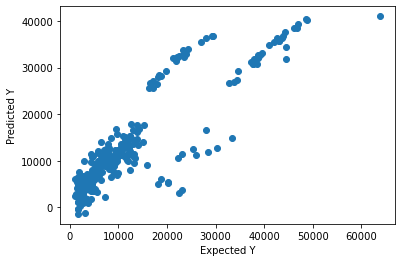

In [48]:
# Visualizing Prediction
plt.scatter(y_test, LRPrediction)
plt.xlabel('Expected Y')
plt.ylabel('Predicted Y')